In [1]:
from Feed_Forward_NN import *
from train_fn import *
from activation_fns_and_grads import *
from loss_fns_with_regularization import *
from optimizers_with_regularization import *
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root=r'C:\Users\Rayan Zaki\Desktop\Fundamentals of Deep Learning\Assignment 1'
    ,train=True
    ,download=False
    
)
test_set = torchvision.datasets.FashionMNIST(
    root=r'C:\Users\Rayan Zaki\Desktop\Fundamentals of Deep Learning\Assignment 1'
    ,train=False
    ,download=False
    
)

In [3]:
X_train = np.array(train_set.data)

Y_train = np.array(train_set.targets)

Y_train= Y_train.reshape(-1,1).T

X_train = X_train.reshape(X_train.shape[0],-1).T

In [4]:
X_test = np.array(test_set.data)

Y_test = np.array(test_set.targets)

Y_test=Y_test.reshape(-1,1).T

X_test = X_test.reshape(X_test.shape[0],-1).T

In [5]:
X_train, X_val, Y_train, Y_val = train_val_split(X_train, Y_train, val_size=0.1, random_state=42)

Optimizers :'sgd', 'momentum', 'rmsprop', 'nesterov', 'adam', 'nadam' 

Output activations : 'softmax', 'linear'

Activation functions : 'relu', 'tanh', 'sigmoid'

Initialization : 'xavier', 'random'

In [6]:
nn=FeedForward_NN(input_features= 784, 
                  output_nodes=10, 
                  hidden_layers_dims=[16],
                  act_fn='relu',
                  dropout = 1, # with what probability u want nodes to be on
                  initialization='xavier')

val cost for epoch  1 =  0.6038695623675006
val accuracy for epoch  1 =  0.7773333333333333
train cost for epoch  1 =  0.9665659880318691
train accuracy for epoch  1 =  0.6696296296296296

val cost for epoch  2 =  0.5031178928508552
val accuracy for epoch  2 =  0.827
train cost for epoch  2 =  0.5370132508183183
train accuracy for epoch  2 =  0.8150185185185185

val cost for epoch  3 =  0.49670405721615857
val accuracy for epoch  3 =  0.8271666666666667
train cost for epoch  3 =  0.47664638448765984
train accuracy for epoch  3 =  0.8395370370370371



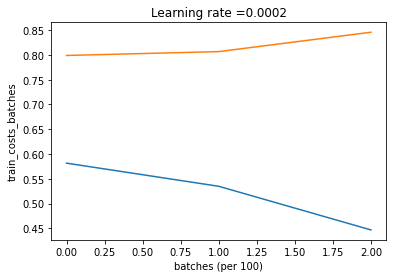

In [7]:
train(model=nn,
      X_train = X_train,
      Y_train = Y_train,
      X_val = X_val,
      Y_val = Y_val,
      output_activation = "softmax",
      output_loss_fn = "cross_entropy",
      epochs = 3, 
      optimizer_name='adam',
      l2_lambd =0.005,
      learning_rate = 0.0002,
      lr_schedule = 0.5,
      batch_size = 512,
      print_cost = True, 
      val = True)

In [8]:
Y_pred=[]
correct=0
for i in range(X_test.shape[1]):
    XL=nn.forward_prop(X_test[:,i].reshape(-1,1))
    pred=act_fn(XL,'softmax')
    class_pred=onehot_to_class(pred)[0][0]
    if class_pred==Y_test[0][i]:
        correct+=1
    Y_pred.append(class_pred)
test_accuracy = correct/len(Y_pred)

In [9]:
print("Test accuracy is ",test_accuracy)

0.8225
